# Liblaries Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/actiavation_Aug_Oct2023.csv')
df.head()

,CO_ID,USER_CREATED_BY,MSISDN,POS_MSISDN,DISTRIBUTER,Plan_Name,ACTIVE_DATE,DEACTIVE_DATE,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag
0,31154967,BJNN1810,891476116,ORG3448,BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTF...,Basic Orange Plan,10/5/2023,NaN,88,NaN,Hard Suspended,Violation of terms,Prepaid,Residential,1,3,48,1.0,TRUE
1,31719208,TTP.PNBR.BLTHBLHBNBF,891433210,NaN,FJFLDTBLFT,Governorates 10,9/28/2023,NaN,95,Medium-term,Active,NaN,Postpaid,PRO,1,7,65,3.0,TRUE
2,30566993,BJNN1810,882740023,NaN,FRBNDHJTF - TBFFXBZ 7TH DJRDLF,Family Orange Plan 10,9/19/2023,NaN,104,Medium-term,Active,NaN,Prepaid,PRO,1,6,65,2.0,TRUE
3,31654015,DPNB1876,529853159,NaN,FNTFRPRJTF TBLFT TTPDL,Orange 90,9/13/2023,10/22/2023,39,Short-term,Deactive,Service Quality,Postpaid,Corporate,1,9,73,NaN,TRUE
4,31237322,DPNB1876,883224490,NaN,FNTFRPRJTF TBLFT TTPDL,Orange 60,8/10/2023,8/28/2023,18,Short-term,Deactive,Lack of Usage,Postpaid,Corporate,1,5,10,NaN,TRUE


# Data Info

In [ ]:
df.dtypes

CO_ID                             int64
USER_CREATED_BY                  object
MSISDN                            int64
POS_MSISDN                       object
DISTRIBUTER                      object
Plan_Name                        object
ACTIVE_DATE                      object
DEACTIVE_DATE                    object
Customer Tenure                   int64
Tenure Category                  object
STATUS                           object
Status Reason                    object
SEGMENT1                         object
SEGMENT2                         object
Churn Flag                        int64
Customer Interaction Score        int64
Loyalty Points                    int64
Data Usage Tier                 float64
Customer Segment Change Flag     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30224 entries, 0 to 30223
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CO_ID                         30224 non-null  int64  
 1   USER_CREATED_BY               30123 non-null  object 
 2   MSISDN                        30224 non-null  int64  
 3   POS_MSISDN                    10653 non-null  object 
 4   DISTRIBUTER                   28419 non-null  object 
 5   Plan_Name                     30224 non-null  object 
 6   ACTIVE_DATE                   30224 non-null  object 
 7   DEACTIVE_DATE                 10156 non-null  object 
 8   Customer Tenure               30224 non-null  int64  
 9   Tenure Category               29929 non-null  object 
 10  STATUS                        30224 non-null  object 
 11  Status Reason                 21064 non-null  object 
 12  SEGMENT1                      30224 non-null  object 
 13  S

In [ ]:
df.isnull().sum()

CO_ID                               0
USER_CREATED_BY                   101
MSISDN                              0
POS_MSISDN                      19571
DISTRIBUTER                      1805
Plan_Name                           0
ACTIVE_DATE                         0
DEACTIVE_DATE                   20068
Customer Tenure                     0
Tenure Category                   295
STATUS                              0
Status Reason                    9160
SEGMENT1                            0
SEGMENT2                            0
Churn Flag                          0
Customer Interaction Score          0
Loyalty Points                      0
Data Usage Tier                  6644
Customer Segment Change Flag        0
dtype: int64

# Checking & Handling Duplicates

In [ ]:
df.duplicated().sum()

427

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.duplicated().sum()

0

# Checking & Handling Wrong Data

In [ ]:
for i in list(df.select_dtypes(include= "object").columns):
    print(f"{i} column's unique values are {list(df[i].unique())}\n")

USER_CREATED_BY column's unique values are ['BJNN1810', 'TTP.PNBR.BLTHBLHBNBF', 'DPNB1876', 'TTP.BLJ.BLRFFBJ', 'TBBZ1911', 'TTP.PLFBT.BLJBNBL', 'DRD.RBXBN.BBVNVHTFN', 'TTP.NPHBNNBD.BLHLJLB', 'DDBT1760', 'TTP.FT.THJFBB.BLFBR', 'XBPH1641', 'DDPT1683', 'BNBNJ.TBLRPRJBLTBNJNJ', 'TTP.TBRB.ZJDBN', 'TTP.FT.HBZJN.THBHFR', 'FBTJNB.BLTHBNNRJ', 'BNBNZ.THFHBDF', 'PH.NBDB.TBZJB', 'RBTB1909', 'TTP.DRD.THBTHB.LHRBJ', 'TTP.HVDB.FRBJDJ', 'TTP.FT.XBFD.RBZBRZB', 'TTP.FT.BHNBD.BBRHPT', 'FT.JNBN.TBLBHBT', 'TTP.FT.PTBNB.THBBFT', 'ZBRB.BLTHBLJJ', 'TTP.FT.TBBBB.XBDJ', 'TTP.FT.BHNBD.NBTBDBH', 'TTP.PH.HBNB.NBJN', 'TTP.PH.THBTHB.THBBBB', 'TTP.FT.HBNFN.PDFH', 'LHBLJD.BBBBNFH', 'TTP.BNBNJ.BPRFNJ', 'FT.BBDBLB.RTBXNH', 'PNBR.BBVTNJNFH', 'TTP.PH.BZB.BLZBHHB', 'TTP.FT.BBTJL.TBLBH', 'TTP.FT.DJNB.HHPVTH', 'TTP.FT.BHNBD.RVRBBN', 'TTP.NBNBR.FNFJZBT', 'TTP.PH.HFBB.THDFJFBT', 'TTP.FT.NPVR.JBLLBD', 'FT.BLJ.ZBJD', 'TTP.FT.RBNJ.HBDDBD', 'TTP.FT.RBXBN.BLLBTFF', 'TTP.FBDJ.BLTBXBLLBFH', 'RFFR1700', 'PH.RBHHBD.ZBHRBN', 'TTP.FT.NPR

In [ ]:
df["Tenure Category"].replace({"Medium": "Medium-term", "Short": "Short-term", "Long": "Long-term"}, inplace= True)

In [ ]:
df["Tenure Category"].unique()

array([nan, 'Medium-term', 'Short-term', 'Long-term'], dtype=object)

In [ ]:
df["STATUS"] = df["STATUS"].str.lower()

In [ ]:
df["STATUS"].unique()

array(['hard suspended', 'active', 'deactive', 'soft suspended'],
      dtype=object)

In [ ]:
df["SEGMENT1"] = df["SEGMENT1"].str.replace("100","")
df["SEGMENT1"] = df["SEGMENT1"].str.replace("400","")
df["SEGMENT1"] = df["SEGMENT1"].str.replace("5","")
df["SEGMENT1"] = df["SEGMENT1"].str.replace("60","")
df["SEGMENT1"] = df["SEGMENT1"].str.replace("300","")

In [ ]:
df["SEGMENT1"].unique()

array(['Prepaid', 'Postpaid'], dtype=object)

In [ ]:
df["Customer Segment Change Flag"].replace({"TRUE": 1, "FALSE": 0, "0": 0, "1": 1}, inplace= True) # I would change them into 0 and 1 as int so we can make sure that when we arrive to the modeling step that it be in a numeric data type

In [ ]:
df["Customer Segment Change Flag"].unique()

array([1, 0])

In [ ]:
df["Plan_Name"].unique()  # Unknown , plan which is a missing data

array(['Basic Orange Plan', 'Governorates 10', 'Family Orange Plan 10',
       'Orange 90', 'Orange 60', 'Student Plan 5', "Traveler's Plan",
       'Orange 30', 'Economy Plan', 'Visitors’ Line Extra',
       'Premium Orange Plan', 'Orange 15', 'Humat Al Watan 8',
       'Orange 9 Max', 'Orange 13 Max', 'Short Visit Line',
       "Visitors' Line", 'Humat Al Watan Golden 7', 'Unknown',
       'Family Orange Plan 20', 'Orange 45', 'YO 9 Max', 'Business Plan',
       'Orange 8 Max', 'Senior Plan', 'Student Plan 7', 'Orange 20',
       'Student Plan 9', 'Humat Al Watan 10', 'Governorates 25',
       'Orange 11 Max', 'Orange 11 4G', 'Student Plan 11',
       'Humat Al Watan Silver 6'], dtype=object)

In [ ]:
for i in list(df.select_dtypes(include= "object").columns):
    print(f"{i} column's unique values are {list(df[i].unique())}\n")

USER_CREATED_BY column's unique values are ['BJNN1810', 'TTP.PNBR.BLTHBLHBNBF', 'DPNB1876', 'TTP.BLJ.BLRFFBJ', 'TBBZ1911', 'TTP.PLFBT.BLJBNBL', 'DRD.RBXBN.BBVNVHTFN', 'TTP.NPHBNNBD.BLHLJLB', 'DDBT1760', 'TTP.FT.THJFBB.BLFBR', 'XBPH1641', 'DDPT1683', 'BNBNJ.TBLRPRJBLTBNJNJ', 'TTP.TBRB.ZJDBN', 'TTP.FT.HBZJN.THBHFR', 'FBTJNB.BLTHBNNRJ', 'BNBNZ.THFHBDF', 'PH.NBDB.TBZJB', 'RBTB1909', 'TTP.DRD.THBTHB.LHRBJ', 'TTP.HVDB.FRBJDJ', 'TTP.FT.XBFD.RBZBRZB', 'TTP.FT.BHNBD.BBRHPT', 'FT.JNBN.TBLBHBT', 'TTP.FT.PTBNB.THBBFT', 'ZBRB.BLTHBLJJ', 'TTP.FT.TBBBB.XBDJ', 'TTP.FT.BHNBD.NBTBDBH', 'TTP.PH.HBNB.NBJN', 'TTP.PH.THBTHB.THBBBB', 'TTP.FT.HBNFN.PDFH', 'LHBLJD.BBBBNFH', 'TTP.BNBNJ.BPRFNJ', 'FT.BBDBLB.RTBXNH', 'PNBR.BBVTNJNFH', 'TTP.PH.BZB.BLZBHHB', 'TTP.FT.BBTJL.TBLBH', 'TTP.FT.DJNB.HHPVTH', 'TTP.FT.BHNBD.RVRBBN', 'TTP.NBNBR.FNFJZBT', 'TTP.PH.HFBB.THDFJFBT', 'TTP.FT.NPVR.JBLLBD', 'FT.BLJ.ZBJD', 'TTP.FT.RBNJ.HBDDBD', 'TTP.FT.RBXBN.BLLBTFF', 'TTP.FBDJ.BLTBXBLLBFH', 'RFFR1700', 'PH.RBHHBD.ZBHRBN', 'TTP.FT.NPR

# Copy of The Data

In [ ]:
copy_df = df.copy()
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29797 entries, 0 to 30007
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CO_ID                         29797 non-null  int64  
 1   USER_CREATED_BY               29697 non-null  object 
 2   MSISDN                        29797 non-null  int64  
 3   POS_MSISDN                    10571 non-null  object 
 4   DISTRIBUTER                   28026 non-null  object 
 5   Plan_Name                     29797 non-null  object 
 6   ACTIVE_DATE                   29797 non-null  object 
 7   DEACTIVE_DATE                 10071 non-null  object 
 8   Customer Tenure               29797 non-null  int64  
 9   Tenure Category               29507 non-null  object 
 10  STATUS                        29797 non-null  object 
 11  Status Reason                 20805 non-null  object 
 12  SEGMENT1                      29797 non-null  object 
 13  S

In [ ]:
copy_df = copy_df.dropna()
copy_df.shape

(274, 19)

<Axes: >

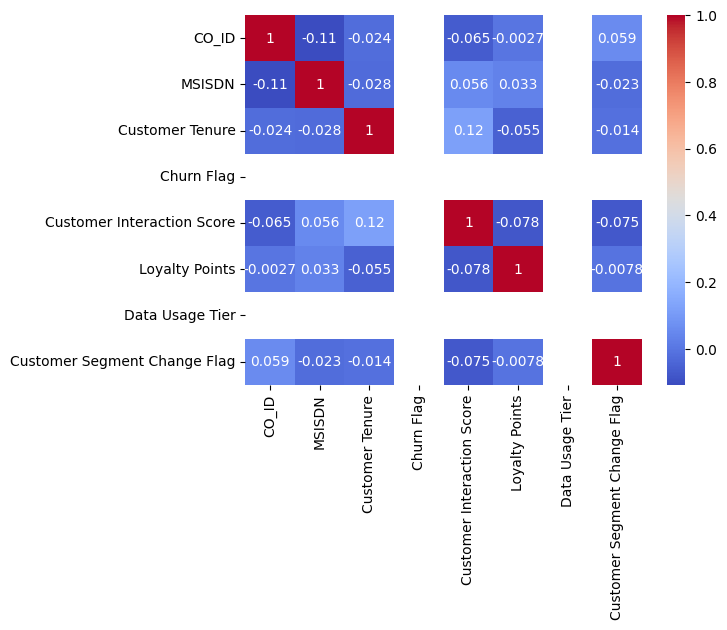

In [ ]:
sns.heatmap(copy_df.select_dtypes(exclude= "object").corr(), annot=True, cmap='coolwarm')

In [ ]:
copy_df.isnull().sum()

CO_ID                           0
USER_CREATED_BY                 0
MSISDN                          0
POS_MSISDN                      0
DISTRIBUTER                     0
Plan_Name                       0
ACTIVE_DATE                     0
DEACTIVE_DATE                   0
Customer Tenure                 0
Tenure Category                 0
STATUS                          0
Status Reason                   0
SEGMENT1                        0
SEGMENT2                        0
Churn Flag                      0
Customer Interaction Score      0
Loyalty Points                  0
Data Usage Tier                 0
Customer Segment Change Flag    0
dtype: int64

# USER_CREATED_BY

In [ ]:
copy_df.DISTRIBUTER.value_counts()

BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)    107
BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN                          88
HPLDFN NBRL                                                  49
HPLDFN XJNHT                                                 16
JNTFRNBL DFPBRTNFNTT                                         11
HVLF DPN                                                      2
BL BNXBR BL BRZBJB FPR NPBJLFT DP.                            1
Name: DISTRIBUTER, dtype: int64

In [ ]:
df.DISTRIBUTER.value_counts()

FNTFRPRJTF TBLFT TTPDL                                      6337
JNTFRNBL DFPBRTNFNTT                                        3306
BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN                         2637
HPLDFN NBRL                                                 2507
BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)    1961
                                                            ... 
TXFJLFH THPP (JT)                                              1
PRPNPTFRT(XBLL TBLFT ) THPP                                    1
TNBRTBVZ DPTNP                                                 1
RVFFN BLJB BJRPPRT DFNTFR                                      1
TNBRTBVZ (VNJVFRTJTZ TTRFFT) THPP                              1
Name: DISTRIBUTER, Length: 151, dtype: int64

In [ ]:
df[df["DISTRIBUTER"] == "FNTFRPRJTF TBLFT TTPDL"]["USER_CREATED_BY"].value_counts()

DPNB1876                 3973
TBBZ1911                  615
RBTB1909                  416
DDPT1683                  352
DDDB1714                  200
XBPH1641                  190
BNBNJ.TBLRPRJBLTBNJNJ     137
DDBT1760                  129
RFFR1700                   91
PH.NBDB.TBZJB              63
PH.TBRB.BBVZBZFD           38
XBTZ1542                   37
TBFB.BLTHBLHBNBJ           13
LHBLJD.BBBBNFH             13
NPVTB.J.BLBRJ              10
PNBR.BLHNBJTZ               8
PH.FLFTBR.HPRJD             8
TBFBB.BLTBLBRNFH            8
TTP.PH.HFBB.THDFJFBT        6
DBNB.BNNBRJN                6
RFHBN.FRJHBT                4
TTP.PNBR.BLTHBLHBNBF        4
DPFL1953                    4
ZBRB.BLTHBLJJ               3
TTP.HRBDFLLB.THHBJBB        2
TTP.PH.HBNB.NBJN            2
TTP.FT.FTRBB.HBTXFH         1
TTP.PH.NBDB.TBZJB           1
TTP.JTTB.BLBXBDBT           1
FVBD.BTBBD                  1
Name: USER_CREATED_BY, dtype: int64

In [ ]:
df[df["DISTRIBUTER"] == "JNTFRNBL DFPBRTNFNTT"]["USER_CREATED_BY"].value_counts()

BJNN1810               3276
ZBRB.BLTHBLJJ            14
BJFN1568                  5
TTP.ZBRB.BLTHBLJJ         5
DDDB1714                  2
TTP.BNBT.ZBNZBTH          1
HRBDFLLB.THHBJBBR         1
DDPT1683                  1
TTP.NPHBNNBD.BBZRBJ       1
Name: USER_CREATED_BY, dtype: int64

In [ ]:
df[df["DISTRIBUTER"] == "BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN"]["USER_CREATED_BY"].value_counts()

BJNN1810                2601
BJFN1568                   8
DDDB1714                   7
RBTB1909                   3
TTP.HRBDFLLB.THHBJBB       2
TTP.FT.PBJDB.LHLJFBT       2
TTP.ZBRB.BLTHBLJJ          2
TTP.NPHNNBD.JTNBJL         1
PH.TBRB.BBVZBZFD           1
TTP.FT.JNBN.TBLBHBT        1
TTP.FT.NPTBB.HLJLBT        1
TTP.FT.HBNFN.PDFH          1
TTP.NPHBNNBD.BBTBPVT       1
TTP.FJRBT.B.HBNNBD         1
TTP.FT.PNBR.HBNDBN         1
BJBL0007                   1
PH.NBDB.TBZJB              1
BNFVN                      1
TTP.NPHBNNBD.BLTBXB        1
Name: USER_CREATED_BY, dtype: int64

In [ ]:
df[df["DISTRIBUTER"] == "BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)"]["USER_CREATED_BY"].value_counts()

BJNN1810                1940
BJFN1568                   6
DPNB1876                   2
TTP.FT.NPTBB.HLJLBT        2
TTP.JTTB.BLBXBDBT          1
BBHBB.BLNBBJDJN            1
TTP.HRBDFLLB.THHBJBB       1
DDPT1683                   1
TTP.FT.PTBNB.TFRBXJ        1
RBTB1909                   1
BJBL0007                   1
TTP.HBNFFN.BBVDJBB         1
TTP.BBFDBLHBLFFN.BLT       1
DDDB1714                   1
BJNN                       1
Name: USER_CREATED_BY, dtype: int64

In [ ]:
copy_df.groupby("DISTRIBUTER").USER_CREATED_BY.value_counts()

DISTRIBUTER                                               USER_CREATED_BY
BL BNXBR BL BRZBJB FPR NPBJLFT DP.                        BNFVN                1
BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)  BJNN1810           107
BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN                       BJNN1810            88
HPLDFN NBRL                                               BJNN1810            49
HPLDFN XJNHT                                              BJNN1810            16
HVLF DPN                                                  BNBBL                1
                                                          BNNT                 1
JNTFRNBL DFPBRTNFNTT                                      BJNN1810            11
Name: USER_CREATED_BY, dtype: int64

In [ ]:
df.USER_CREATED_BY.value_counts()

BJNN1810                15264
DPNB1876                 4005
TBBZ1911                 2354
RBTB1909                  577
TTP.PNBR.BLTHBLHBNBF      394
                        ...  
FT.NBRJBN.BLTHBXFFTH        1
NPHBNNBD.BLTBXB             1
FT.BHNBD.BBVHPTNB           1
FT.BLJ.BLDBRBDLFH           1
DBNJB.TBFJ                  1
Name: USER_CREATED_BY, Length: 631, dtype: int64

In [ ]:
def USER_FILL(DISTRIBUTER):
    if DISTRIBUTER == "BL BNXBR BL BRZBJB FPR NPBJLFT DP.":
        return "BNFVN"
    elif DISTRIBUTER == "HVLF DPN":
        return "BNBBL"
    elif DISTRIBUTER == "FNTFRPRJTF TBLFT TTPDL":
        return "DPNB1876"
    else:
        return "BJNN1810"

In [ ]:
df["USER_CREATED_BY"] = df.apply(lambda row: USER_FILL(row["DISTRIBUTER"]) if pd.isna(row["USER_CREATED_BY"]) else row["USER_CREATED_BY"], axis= 1)

In [ ]:
df["USER_CREATED_BY"].isnull().sum()

0

# DISTRIBUTER

In [ ]:
copy_df.groupby("DISTRIBUTER").USER_CREATED_BY.value_counts()

DISTRIBUTER                                               USER_CREATED_BY
BL BNXBR BL BRZBJB FPR NPBJLFT DP.                        BNFVN                1
BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)  BJNN1810           107
BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN                       BJNN1810            88
HPLDFN NBRL                                               BJNN1810            49
HPLDFN XJNHT                                              BJNN1810            16
HVLF DPN                                                  BNBBL                1
                                                          BNNT                 1
JNTFRNBL DFPBRTNFNTT                                      BJNN1810            11
Name: USER_CREATED_BY, dtype: int64

In [ ]:
copy_df2 = df["DISTRIBUTER"].copy()
copy_df2.dropna(inplace= True)
copy_df2.value_counts()

FNTFRPRJTF TBLFT TTPDL                                      6337
JNTFRNBL DFPBRTNFNTT                                        3306
BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN                         2637
HPLDFN NBRL                                                 2507
BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)    1961
                                                            ... 
TXFJLFH THPP (JT)                                              1
PRPNPTFRT(XBLL TBLFT ) THPP                                    1
TNBRTBVZ DPTNP                                                 1
RVFFN BLJB BJRPPRT DFNTFR                                      1
TNBRTBVZ (VNJVFRTJTZ TTRFFT) THPP                              1
Name: DISTRIBUTER, Length: 151, dtype: int64

In [ ]:
df["DISTRIBUTER"].value_counts()

FNTFRPRJTF TBLFT TTPDL                                      6337
JNTFRNBL DFPBRTNFNTT                                        3306
BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN                         2637
HPLDFN NBRL                                                 2507
BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)    1961
                                                            ... 
TXFJLFH THPP (JT)                                              1
PRPNPTFRT(XBLL TBLFT ) THPP                                    1
TNBRTBVZ DPTNP                                                 1
RVFFN BLJB BJRPPRT DFNTFR                                      1
TNBRTBVZ (VNJVFRTJTZ TTRFFT) THPP                              1
Name: DISTRIBUTER, Length: 151, dtype: int64

In [ ]:
df[df["DISTRIBUTER"]== "FNTFRPRJTF TBLFT TTPDL"]["USER_CREATED_BY"].value_counts()

DPNB1876                 3974
TBBZ1911                  615
RBTB1909                  416
DDPT1683                  352
DDDB1714                  200
XBPH1641                  190
BNBNJ.TBLRPRJBLTBNJNJ     137
DDBT1760                  129
RFFR1700                   91
PH.NBDB.TBZJB              63
PH.TBRB.BBVZBZFD           38
XBTZ1542                   37
TBFB.BLTHBLHBNBJ           13
LHBLJD.BBBBNFH             13
NPVTB.J.BLBRJ              10
PNBR.BLHNBJTZ               8
PH.FLFTBR.HPRJD             8
TBFBB.BLTBLBRNFH            8
TTP.PH.HFBB.THDFJFBT        6
DBNB.BNNBRJN                6
RFHBN.FRJHBT                4
TTP.PNBR.BLTHBLHBNBF        4
DPFL1953                    4
ZBRB.BLTHBLJJ               3
TTP.HRBDFLLB.THHBJBB        2
TTP.PH.HBNB.NBJN            2
TTP.FT.FTRBB.HBTXFH         1
TTP.PH.NBDB.TBZJB           1
TTP.JTTB.BLBXBDBT           1
FVBD.BTBBD                  1
Name: USER_CREATED_BY, dtype: int64

In [ ]:
df[df["DISTRIBUTER"]== "JNTFRNBL DFPBRTNFNTT"]["USER_CREATED_BY"].value_counts()

BJNN1810               3276
ZBRB.BLTHBLJJ            14
BJFN1568                  5
TTP.ZBRB.BLTHBLJJ         5
DDDB1714                  2
TTP.BNBT.ZBNZBTH          1
HRBDFLLB.THHBJBBR         1
DDPT1683                  1
TTP.NPHBNNBD.BBZRBJ       1
Name: USER_CREATED_BY, dtype: int64

In [ ]:
df[df["DISTRIBUTER"]== "BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)"]["USER_CREATED_BY"].value_counts()

BJNN1810                1940
BJFN1568                   6
DPNB1876                   2
TTP.FT.NPTBB.HLJLBT        2
TTP.JTTB.BLBXBDBT          1
BBHBB.BLNBBJDJN            1
TTP.HRBDFLLB.THHBJBB       1
DDPT1683                   1
TTP.FT.PTBNB.TFRBXJ        1
RBTB1909                   1
BJBL0007                   1
TTP.HBNFFN.BBVDJBB         1
TTP.BBFDBLHBLFFN.BLT       1
DDDB1714                   1
BJNN                       1
Name: USER_CREATED_BY, dtype: int64

In [ ]:
# بناءا على ذلك

def DIS_Fill(USER):
    if USER == "DPNB1876":
        return "FNTFRPRJTF TBLFT TTPDL"
    else:
        ratios = [0.32, 0.25, 0.24, 0.19]

        return np.random.choice(["JNTFRNBL DFPBRTNFNTT", "BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN", "HPLDFN NBRL", "BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL)"], 1, p=ratios)

In [ ]:
df["DISTRIBUTER"] = df.apply(lambda row: USER_FILL(row["USER_CREATED_BY"]) if pd.isna(row["DISTRIBUTER"]) else row["DISTRIBUTER"], axis= 1)

In [ ]:
df["DISTRIBUTER"].isnull().sum()

0

# POS_MSISDN

In [ ]:
POS_train_df = df[["DISTRIBUTER", "POS_MSISDN"]].copy()
POS_train_df.dropna(inplace= True)
POS_train_df.isnull().sum()

DISTRIBUTER    0
POS_MSISDN     0
dtype: int64

In [ ]:
df.groupby("POS_MSISDN").USER_CREATED_BY.value_counts()

POS_MSISDN  USER_CREATED_BY
ORG2232     BJNN1810           64
            BJFN1568            1
ORG2234     BJNN1810           53
ORG2242     BJNN1810           58
ORG2251     BJNN1810           73
                               ..
ORG4395     BJNN1810           79
            BJFN1568            1
ORG4400     BJNN1810           82
ORG4425     BJNN1810           67
ORG4438     BJNN1810           64
Name: USER_CREATED_BY, Length: 185, dtype: int64

In [ ]:
POS_train_df.shape

(10571, 2)

In [ ]:
POS_train_df = pd.get_dummies(POS_train_df, columns=['DISTRIBUTER'])
POS_train_df.head()

,POS_MSISDN,DISTRIBUTER_BL BNXBR BL BRZBJB FPR NPBJLFT DP.,DISTRIBUTER_BL-BNXBR PPTT,DISTRIBUTER_BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL),DISTRIBUTER_BL-RBNTHB (JT),DISTRIBUTER_BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN,DISTRIBUTER_DFBR BLB'B (JT),DISTRIBUTER_DJRFDT PVTTPVRDF THPP,DISTRIBUTER_DJRFDT TVPPPRT,DISTRIBUTER_F-THPP,...,DISTRIBUTER_FRBNDHJTF TNBRTBVZ TBJ NBLL,DISTRIBUTER_FRBNDHJTF TNBRTBVZ TBJ NBLL THPP,DISTRIBUTER_FRBNDHJTF TXFJLFH,DISTRIBUTER_HPLDFN NBRL,DISTRIBUTER_HPLDFN XJNHT,DISTRIBUTER_HVLF DPN,DISTRIBUTER_JNTFRNBL DFPBRTNFNTT,DISTRIBUTER_JRBJD VNJVFRTJTZ TTRFFT,DISTRIBUTER_JRBJD _JT THPP,DISTRIBUTER_TXFJFJFH DFNTFR
0,ORG3448,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ORG2574,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ORG4277,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,ORG4438,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,ORG3798,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
la = LabelEncoder()
POS_train_df["POS_MSISDN"] = la.fit_transform(POS_train_df["POS_MSISDN"])
POS_train_df.head()

,POS_MSISDN,DISTRIBUTER_BL BNXBR BL BRZBJB FPR NPBJLFT DP.,DISTRIBUTER_BL-BNXBR PPTT,DISTRIBUTER_BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTFRNBTJPNBL),DISTRIBUTER_BL-RBNTHB (JT),DISTRIBUTER_BLBBTHFR FPR TRBDF BND DJTTRJBVTJPN,DISTRIBUTER_DFBR BLB'B (JT),DISTRIBUTER_DJRFDT PVTTPVRDF THPP,DISTRIBUTER_DJRFDT TVPPPRT,DISTRIBUTER_F-THPP,...,DISTRIBUTER_FRBNDHJTF TNBRTBVZ TBJ NBLL,DISTRIBUTER_FRBNDHJTF TNBRTBVZ TBJ NBLL THPP,DISTRIBUTER_FRBNDHJTF TXFJLFH,DISTRIBUTER_HPLDFN NBRL,DISTRIBUTER_HPLDFN XJNHT,DISTRIBUTER_HVLF DPN,DISTRIBUTER_JNTFRNBL DFPBRTNFNTT,DISTRIBUTER_JRBJD VNJVFRTJTZ TTRFFT,DISTRIBUTER_JRBJD _JT THPP,DISTRIBUTER_TXFJFJFH DFNTFR
0,85,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,27,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,143,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,155,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,108,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
results_df = pd.DataFrame(columns=['Model', 'Random_State', 'Accuracy'])
results_df

X = POS_train_df.drop("POS_MSISDN", axis = 1)
y = POS_train_df["POS_MSISDN"]

for i in range(30):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

  k=7
  knn = KNeighborsClassifier(n_neighbors=k)


  knn.fit(X_train, y_train)



  y_pred = knn.predict(X_test)

  results_df.loc[len(results_df)] = ['kNN', i, accuracy_score(y_test,y_pred)]
results_df

,Model,Random_State,Accuracy
0,kNN,0,0.003783
1,kNN,1,0.003783
2,kNN,2,0.007251
3,kNN,3,0.004729
4,kNN,4,0.006305
5,kNN,5,0.005359
6,kNN,6,0.005675
7,kNN,7,0.008512
8,kNN,8,0.004414
9,kNN,9,0.005990


In [ ]:
from sklearn.tree import DecisionTreeClassifier
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

  clf = DecisionTreeClassifier()

  clf.fit(X_train, y_train)

  y_pred= clf.predict(X_test)

  results_df.loc[len(results_df)] = ['clf', i, accuracy_score(y_test,y_pred)]
results_df

,Model,Random_State,Accuracy
0,kNN,0,0.003783
1,kNN,1,0.003783
2,kNN,2,0.007251
3,kNN,3,0.004729
4,kNN,4,0.006305
5,kNN,5,0.005359
6,kNN,6,0.005675
7,kNN,7,0.008512
8,kNN,8,0.004414
9,kNN,9,0.005990


In [ ]:
df["POS_MSISDN"].isnull().sum()

19226

In [ ]:
df["POS_MSISDN"].mode()

0    ORG2464
Name: POS_MSISDN, dtype: object

In [ ]:
df["POS_MSISDN"] = df["POS_MSISDN"].fillna("ORG2464")

In [ ]:
df["POS_MSISDN"].isnull().sum()

0

# DEACTIVE_DATE

In [ ]:
df['ACTIVE_DATE'] = [datetime.strptime(date_str, '%m/%d/%Y') for date_str in df['ACTIVE_DATE']]

In [ ]:
df["DEACTIVE_DATE"].isnull().sum()

19726

In [ ]:
df[df["STATUS"] == "Active"].isnull().sum()

CO_ID                           0.0
USER_CREATED_BY                 0.0
MSISDN                          0.0
POS_MSISDN                      0.0
DISTRIBUTER                     0.0
Plan_Name                       0.0
ACTIVE_DATE                     0.0
DEACTIVE_DATE                   0.0
Customer Tenure                 0.0
Tenure Category                 0.0
STATUS                          0.0
Status Reason                   0.0
SEGMENT1                        0.0
SEGMENT2                        0.0
Churn Flag                      0.0
Customer Interaction Score      0.0
Loyalty Points                  0.0
Data Usage Tier                 0.0
Customer Segment Change Flag    0.0
dtype: float64

In [ ]:
df2 = df[df["DEACTIVE_DATE"].isnull()]
df.loc[df["STATUS"] == "Active", "DEACTIVE_DATE"] = df2.loc[df2["STATUS"] == "Active", "DEACTIVE_DATE"].fillna("1/1/2999")

In [ ]:
df[df["STATUS"] == "Active"].isnull().sum()

CO_ID                           0.0
USER_CREATED_BY                 0.0
MSISDN                          0.0
POS_MSISDN                      0.0
DISTRIBUTER                     0.0
Plan_Name                       0.0
ACTIVE_DATE                     0.0
DEACTIVE_DATE                   0.0
Customer Tenure                 0.0
Tenure Category                 0.0
STATUS                          0.0
Status Reason                   0.0
SEGMENT1                        0.0
SEGMENT2                        0.0
Churn Flag                      0.0
Customer Interaction Score      0.0
Loyalty Points                  0.0
Data Usage Tier                 0.0
Customer Segment Change Flag    0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29797 entries, 0 to 30007
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CO_ID                         29797 non-null  int64         
 1   USER_CREATED_BY               29797 non-null  object        
 2   MSISDN                        29797 non-null  int64         
 3   POS_MSISDN                    29797 non-null  object        
 4   DISTRIBUTER                   29797 non-null  object        
 5   Plan_Name                     29797 non-null  object        
 6   ACTIVE_DATE                   29797 non-null  datetime64[ns]
 7   DEACTIVE_DATE                 10071 non-null  object        
 8   Customer Tenure               29797 non-null  int64         
 9   Tenure Category               29507 non-null  object        
 10  STATUS                        29797 non-null  object        
 11  Status Reason               

In [ ]:
df2 = df[df["DEACTIVE_DATE"].isnull()]

In [ ]:
df2.head()

,CO_ID,USER_CREATED_BY,MSISDN,POS_MSISDN,DISTRIBUTER,Plan_Name,ACTIVE_DATE,DEACTIVE_DATE,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag
0,31154967,BJNN1810,891476116,ORG3448,BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTF...,Basic Orange Plan,2023-10-05,NaN,88,NaN,hard suspended,Violation of terms,Prepaid,Residential,1,3,48,1.0,1
1,31719208,TTP.PNBR.BLTHBLHBNBF,891433210,ORG2464,FJFLDTBLFT,Governorates 10,2023-09-28,NaN,95,Medium-term,active,NaN,Postpaid,PRO,1,7,65,3.0,1
2,30566993,BJNN1810,882740023,ORG2464,FRBNDHJTF - TBFFXBZ 7TH DJRDLF,Family Orange Plan 10,2023-09-19,NaN,104,Medium-term,active,NaN,Prepaid,PRO,1,6,65,2.0,1
5,29714007,BJNN1810,889904983,ORG2574,BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTF...,Family Orange Plan 10,2023-08-28,NaN,126,Long-term,active,NaN,Prepaid,Residential,0,7,85,3.0,1
6,30524617,BJNN1810,891281770,ORG4277,HPLDFN NBRL,Student Plan 5,2023-09-22,NaN,101,Medium-term,soft suspended,Service upgrade,Prepaid,Residential,0,10,55,2.0,1


In [ ]:
for i in df2.index:
  ActiveDate = df.loc[i, "ACTIVE_DATE"]
  Tunner = df.loc[i, "Customer Tenure"]
  DeactiveDate = ActiveDate + timedelta(days = int(Tunner))
  DeactiveDateFormat = DeactiveDate.strftime('%m/%d/%Y')
  df.loc[i, "DEACTIVE_DATE"] = DeactiveDateFormat

In [ ]:
df["DEACTIVE_DATE"].isnull().sum()

0

In [ ]:
df.head()

,CO_ID,USER_CREATED_BY,MSISDN,POS_MSISDN,DISTRIBUTER,Plan_Name,ACTIVE_DATE,DEACTIVE_DATE,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag
0,31154967,BJNN1810,891476116,ORG3448,BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTF...,Basic Orange Plan,2023-10-05,01/01/2024,88,NaN,hard suspended,Violation of terms,Prepaid,Residential,1,3,48,1.0,1
1,31719208,TTP.PNBR.BLTHBLHBNBF,891433210,ORG2464,FJFLDTBLFT,Governorates 10,2023-09-28,01/01/2024,95,Medium-term,active,NaN,Postpaid,PRO,1,7,65,3.0,1
2,30566993,BJNN1810,882740023,ORG2464,FRBNDHJTF - TBFFXBZ 7TH DJRDLF,Family Orange Plan 10,2023-09-19,01/01/2024,104,Medium-term,active,NaN,Prepaid,PRO,1,6,65,2.0,1
3,31654015,DPNB1876,529853159,ORG2464,FNTFRPRJTF TBLFT TTPDL,Orange 90,2023-09-13,10/22/2023,39,Short-term,deactive,Service Quality,Postpaid,Corporate,1,9,73,NaN,1
4,31237322,DPNB1876,883224490,ORG2464,FNTFRPRJTF TBLFT TTPDL,Orange 60,2023-08-10,8/28/2023,18,Short-term,deactive,Lack of Usage,Postpaid,Corporate,1,5,10,NaN,1


In [ ]:
df['DEACTIVE_DATE'] = [datetime.strptime(date_str, '%m/%d/%Y') for date_str in df['DEACTIVE_DATE']]

# Tenure Category

In [ ]:
print("max\n",df["Customer Tenure"].groupby(by= df["Tenure Category"]).max())
print("min\n",df["Customer Tenure"].groupby(by= df["Tenure Category"]).min())

max
 Tenure Category
Long-term      153
Medium-term    119
Short-term      86
Name: Customer Tenure, dtype: int64
min
 Tenure Category
Long-term      120
Medium-term     89
Short-term       0
Name: Customer Tenure, dtype: int64


In [ ]:
def Tenure_Category_func(x):
    if x >= 120:
        return "Long-term"
    elif x >= 89:
        return "Medium-term"
    else:
        return "Short-term"


Tenure_Null = df[df["Tenure Category"].isnull()]
values_to_fill2 =  Tenure_Null["Customer Tenure"].apply(Tenure_Category_func)
df["Tenure Category"] = df["Tenure Category"].fillna(values_to_fill2)

# Status Reason

In [ ]:
df.isnull().sum()

CO_ID                              0
USER_CREATED_BY                    0
MSISDN                             0
POS_MSISDN                         0
DISTRIBUTER                        0
Plan_Name                          0
ACTIVE_DATE                        0
DEACTIVE_DATE                      0
Customer Tenure                    0
Tenure Category                    0
STATUS                             0
Status Reason                   8992
SEGMENT1                           0
SEGMENT2                           0
Churn Flag                         0
Customer Interaction Score         0
Loyalty Points                     0
Data Usage Tier                 6591
Customer Segment Change Flag       0
dtype: int64

In [ ]:
df.groupby("STATUS")["Status Reason"].value_counts().sum()

20805

In [ ]:
print(30224 - 21064)

9160


In [ ]:
df.groupby("STATUS")["Status Reason"].sum()

STATUS
active                                                            0
deactive          Service QualityLack of UsageTechnical Difficul...
hard suspended    Violation of termsIllegal usageNon-paymentNon-...
soft suspended    Service upgradeService upgradeDocument verific...
Name: Status Reason, dtype: object

In [ ]:
df["Status Reason"].fillna("Still Active", inplace= True)

# Data Usage Tier

In [ ]:
# Data Usage Tier is left to be filled, and to fill the Data Usage Tier, I'll first encode the data, so I can plot the heatmap to see if I can fill the column according to another feature.

In [ ]:
df.head()

,CO_ID,USER_CREATED_BY,MSISDN,POS_MSISDN,DISTRIBUTER,Plan_Name,ACTIVE_DATE,DEACTIVE_DATE,Customer Tenure,Tenure Category,STATUS,Status Reason,SEGMENT1,SEGMENT2,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag
0,31154967,BJNN1810,891476116,ORG3448,BL-NVTBTBXFRB BL-LB NVTBNBHFZB (LJNJTLFTT JNTF...,Basic Orange Plan,2023-10-05,2024-01-01,88,0,1,Violation of terms,0,Residential,1,3,48,1.0,1
1,31719208,TTP.PNBR.BLTHBLHBNBF,891433210,ORG2464,FJFLDTBLFT,Governorates 10,2023-09-28,2024-01-01,95,1,3,Still Active,1,PRO,1,7,65,3.0,1
2,30566993,BJNN1810,882740023,ORG2464,FRBNDHJTF - TBFFXBZ 7TH DJRDLF,Family Orange Plan 10,2023-09-19,2024-01-01,104,1,3,Still Active,0,PRO,1,6,65,2.0,1
3,31654015,DPNB1876,529853159,ORG2464,FNTFRPRJTF TBLFT TTPDL,Orange 90,2023-09-13,2023-10-22,39,0,0,Service Quality,1,Corporate,1,9,73,1.0,1
4,31237322,DPNB1876,883224490,ORG2464,FNTFRPRJTF TBLFT TTPDL,Orange 60,2023-08-10,2023-08-28,18,0,0,Lack of Usage,1,Corporate,1,5,10,1.0,1


In [ ]:
df["Data Usage Tier"].value_counts()

1.0    17322
3.0     8990
2.0     3485
Name: Data Usage Tier, dtype: int64

In [ ]:
df["SEGMENT1"] = df["SEGMENT1"].map({'Prepaid': 0, 'Postpaid': 1})

df["STATUS"] = df["STATUS"].map({'deactive': 0, 'hard suspended': 1, 'soft suspended': 2, 'active':3})

df["Tenure Category"] = df["Tenure Category"].map({'Short-term': 0, 'Medium-term': 1, 'Long-term': 2})

<ipython-input-108-7854ec09fac2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.select_dtypes(exclude= "object").corr(), annot=True, cmap='coolwarm')


<Axes: >

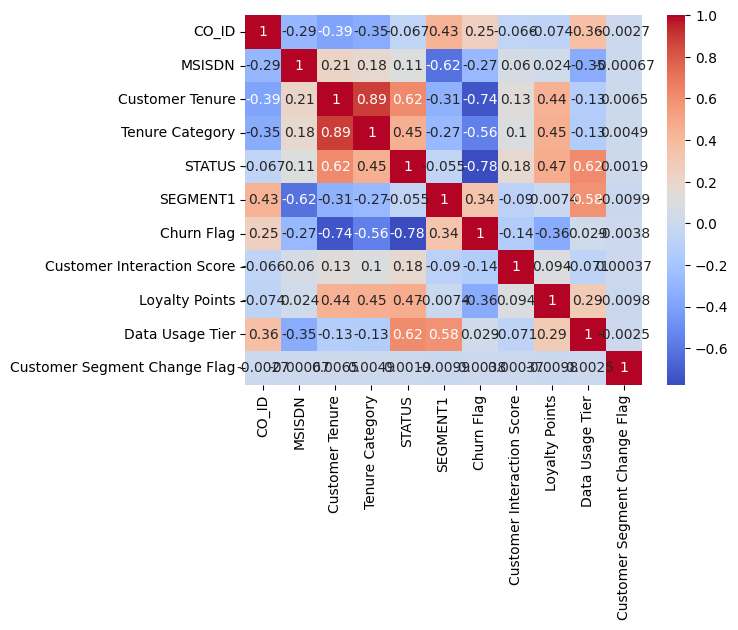

In [ ]:
sns.heatmap(df.select_dtypes(exclude= "object").corr(), annot=True, cmap='coolwarm')

In [ ]:
df["Data Usage Tier"].groupby(by= df["STATUS"]).mean()

STATUS
0    2.000287
1    1.000173
2    1.000402
3    2.999666
Name: Data Usage Tier, dtype: float64

In [ ]:
def Data_Usage_Tier(x):
    if x == 0:
        return 1
    elif x == 3:
        return 2
    else:
        return 0


Data_Usage_Tier_Null = df[df["Data Usage Tier"].isnull()]
values_to_fill3 =  Data_Usage_Tier_Null["STATUS"].apply(Data_Usage_Tier)
df["Data Usage Tier"] = df["Data Usage Tier"].fillna(values_to_fill3)

In [ ]:
df["Data Usage Tier"].isnull().sum()

0

# *

In [ ]:
df.isnull().sum()

CO_ID                           0
USER_CREATED_BY                 0
MSISDN                          0
POS_MSISDN                      0
DISTRIBUTER                     0
Plan_Name                       0
ACTIVE_DATE                     0
DEACTIVE_DATE                   0
Customer Tenure                 0
Tenure Category                 0
STATUS                          0
Status Reason                   0
SEGMENT1                        0
SEGMENT2                        0
Churn Flag                      0
Customer Interaction Score      0
Loyalty Points                  0
Data Usage Tier                 0
Customer Segment Change Flag    0
dtype: int64

In [ ]:
del df["CO_ID"] # Coustumer ID wont help us by the predection proccess
del df["MSISDN"] # Also the Phone Number wont help us in the predection proccess
del df["USER_CREATED_BY"] # Looking to the picture above, this column would be impossible to encode, as it doesn't really affect the prediction
del df["ACTIVE_DATE"]
del df["DEACTIVE_DATE"]

# Handling Dtypes to make it around 32 bit

In [ ]:
df1 = pd.DataFrame(df.dtypes)
for i in df1[df1[0] == "int64"].index:
  df[i] = df[i].astype(dtype = "int16")

df["Data Usage Tier"] = df["Data Usage Tier"].astype(dtype="float16")
# Data Usage Tier 	            float64
# Customer Tenure 	            int64
# Tenure Category 	            int64
# STATUS                       	int64
# SEGMENT1 	                    int64
# Churn Flag 	                  int64
# Customer Interaction Score 	  int64
# Loyalty Points              	int64
# Customer Segment Change Flag 	int64

In [ ]:
df.dtypes

POS_MSISDN                       object
DISTRIBUTER                      object
Plan_Name                        object
Customer Tenure                   int16
Tenure Category                   int16
STATUS                            int16
Status Reason                    object
SEGMENT1                          int16
SEGMENT2                         object
Churn Flag                        int16
Customer Interaction Score        int16
Loyalty Points                    int16
Data Usage Tier                 float16
Customer Segment Change Flag      int16
dtype: object

# Starting Encoding the data

In [ ]:
df.dtypes

POS_MSISDN                       object
DISTRIBUTER                      object
Plan_Name                        object
Customer Tenure                   int16
Tenure Category                   int16
STATUS                            int16
Status Reason                    object
SEGMENT1                          int16
SEGMENT2                         object
Churn Flag                        int16
Customer Interaction Score        int16
Loyalty Points                    int16
Data Usage Tier                 float16
Customer Segment Change Flag      int16
dtype: object

In [ ]:
df.shape

(29797, 14)

In [ ]:
df = pd.get_dummies(df, columns=['POS_MSISDN', 'DISTRIBUTER', 'Plan_Name', 'Status Reason', 'SEGMENT2'])

In [ ]:
df.shape

(29797, 372)

In [ ]:
df.isnull().sum().sum()

0

# Normalizing, Scaling, and log Transforming Data

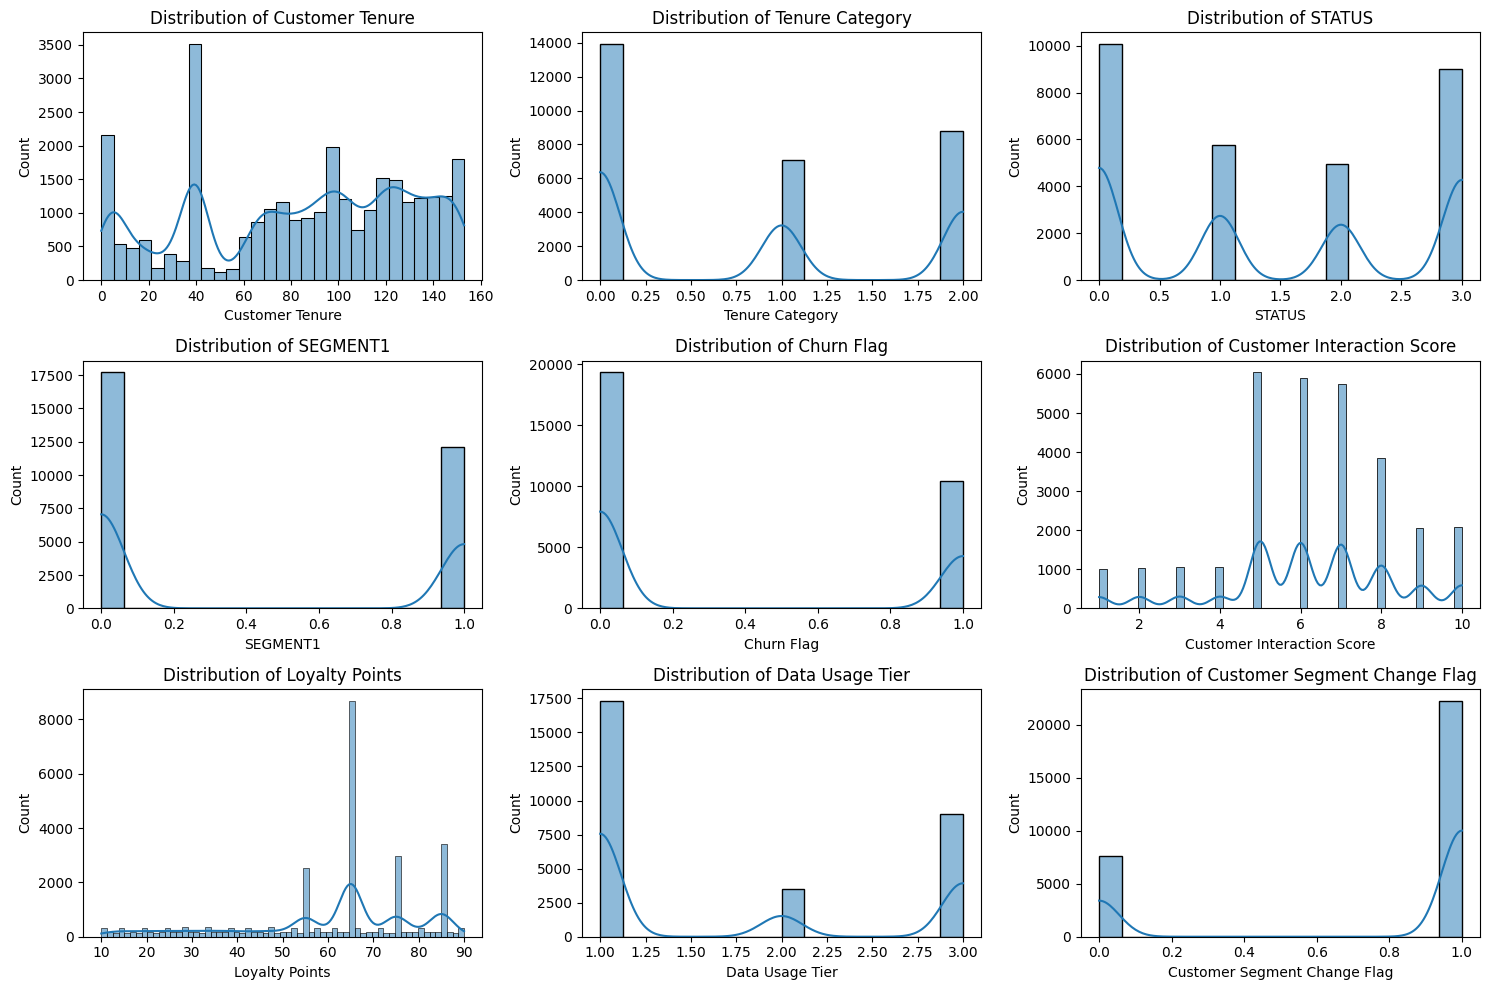

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns for distribution graphs
numerical_columns = df.select_dtypes(include= ["float16", "int16"]).columns

# Plotting the distribution of each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


In [ ]:
columns_to_normalize = ['STATUS', 'Tenure Category', 'Customer Tenure', 'Customer Interaction Score', 'Data Usage Tier']

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


df.head()


,Customer Tenure,Tenure Category,STATUS,SEGMENT1,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag,POS_MSISDN_ORG2232,...,Status Reason_Price,Status Reason_Service Quality,Status Reason_Service upgrade,Status Reason_Still Active,Status Reason_Technical Difficulties,Status Reason_Technical issue,Status Reason_Violation of terms,SEGMENT2_Corporate,SEGMENT2_PRO,SEGMENT2_Residential
0,0.575163,0.0,0.333333,0,1,0.222222,48,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.620915,0.5,1.000000,1,1,0.666667,65,1.0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0.679739,0.5,1.000000,0,1,0.555556,65,0.5,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.254902,0.0,0.000000,1,1,0.888889,73,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.117647,0.0,0.000000,1,1,0.444444,10,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
columns_to_standardize = ['Loyalty Points']

scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.head()

,Customer Tenure,Tenure Category,STATUS,SEGMENT1,Churn Flag,Customer Interaction Score,Loyalty Points,Data Usage Tier,Customer Segment Change Flag,POS_MSISDN_ORG2232,...,Status Reason_Price,Status Reason_Service Quality,Status Reason_Service upgrade,Status Reason_Still Active,Status Reason_Technical Difficulties,Status Reason_Technical issue,Status Reason_Violation of terms,SEGMENT2_Corporate,SEGMENT2_PRO,SEGMENT2_Residential
0,0.575163,0.0,0.333333,0,1,0.222222,-0.639587,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.620915,0.5,1.000000,1,1,0.666667,0.232329,1.0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0.679739,0.5,1.000000,0,1,0.555556,0.232329,0.5,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.254902,0.0,0.000000,1,1,0.888889,0.642642,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.117647,0.0,0.000000,1,1,0.444444,-2.588575,0.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Done

# Start Modelling and making Comparrision using evaluation matrix and Cross Validation

In [ ]:
results_df = pd.DataFrame(columns=['Model', 'Random_State', 'Accuracy','Precision','Recall','F1_score'])
results_df

,Model,Random_State,Accuracy,Precision,Recall,F1_score


In [ ]:
X = df.drop('SEGMENT1', axis=1)
y = df['SEGMENT1']

In [ ]:
for i in range(30):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

  k=3
  knn = KNeighborsClassifier(n_neighbors=k)


  knn.fit(X_train, y_train)



  y_pred = knn.predict(X_test)

  results_df.loc[len(results_df)] = ['kNN', i, accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)]
results_df

,Model,Random_State,Accuracy,Precision,Recall,F1_score
0,kNN,0,0.987808,0.981400,0.988702,0.985038
1,kNN,1,0.990157,0.986268,0.989529,0.987895
2,kNN,2,0.988591,0.981436,0.990631,0.986012
3,kNN,3,0.989262,0.983046,0.990631,0.986824
4,kNN,4,0.989709,0.982538,0.992284,0.987387
5,kNN,5,0.987136,0.976668,0.992009,0.984279
6,kNN,6,0.989821,0.982806,0.992284,0.987522
7,kNN,7,0.989262,0.982518,0.991182,0.986831
8,kNN,8,0.988926,0.982768,0.990080,0.986410
9,kNN,9,0.988702,0.980916,0.991458,0.986159


In [ ]:
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

  logistic_regression = LogisticRegression()

  logistic_regression.fit(X_train, y_train)

  y_pred= logistic_regression.predict(X_test)

  results_df.loc[len(results_df)] = ['Logistic Regression', i, accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)]
results_df

,Model,Random_State,Accuracy,Precision,Recall,F1_score
0,kNN,0,0.987808,0.981400,0.988702,0.985038
1,kNN,1,0.990157,0.986268,0.989529,0.987895
2,kNN,2,0.988591,0.981436,0.990631,0.986012
3,kNN,3,0.989262,0.983046,0.990631,0.986824
4,kNN,4,0.989709,0.982538,0.992284,0.987387
5,kNN,5,0.987136,0.976668,0.992009,0.984279
6,kNN,6,0.989821,0.982806,0.992284,0.987522
7,kNN,7,0.989262,0.982518,0.991182,0.986831
8,kNN,8,0.988926,0.982768,0.990080,0.986410
9,kNN,9,0.988702,0.980916,0.991458,0.986159


In [ ]:
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

  scv_classifier = SVC()

  scv_classifier.fit(X_train, y_train)

  y_pred = scv_classifier.predict(X_test)

  results_df.loc[len(results_df)] = ['LinearSVC', i, accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)]
results_df

,Model,Random_State,Accuracy,Precision,Recall,F1_score
0,kNN,0,0.987808,0.981400,0.988702,0.985038
1,kNN,1,0.990157,0.986268,0.989529,0.987895
2,kNN,2,0.988591,0.981436,0.990631,0.986012
3,kNN,3,0.989262,0.983046,0.990631,0.986824
4,kNN,4,0.989709,0.982538,0.992284,0.987387
...,...,...,...,...,...,...
85,LinearSVC,25,0.997875,0.998894,0.995867,0.997378
86,LinearSVC,26,0.997539,0.997517,0.996418,0.996967
87,LinearSVC,27,0.996980,0.997514,0.995040,0.996275
88,LinearSVC,28,0.997651,0.997792,0.996418,0.997105


In [ ]:
average_results = results_df.groupby('Model').mean().drop(columns='Random_State').round(3).reset_index()
average_results

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.997,0.998,0.996,0.997
1,Logistic Regression,0.997,0.998,0.996,0.997
2,kNN,0.989,0.982,0.991,0.987


# Visaulization using bar and box plots


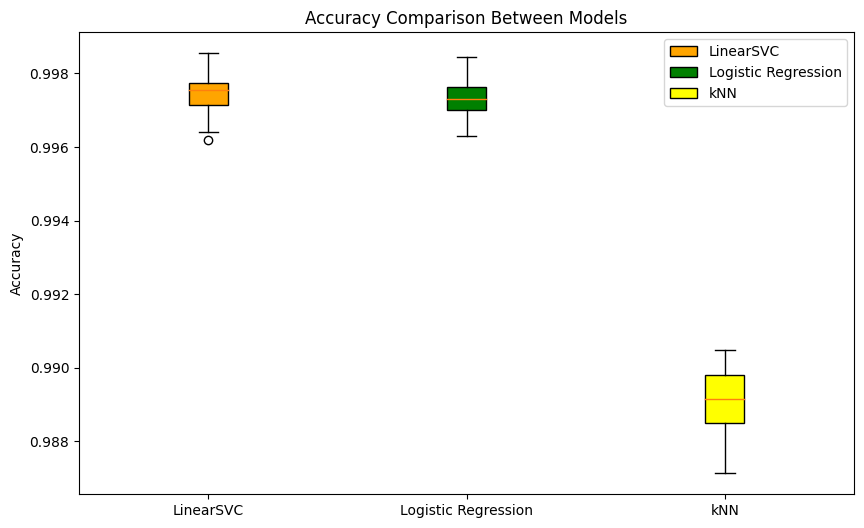

In [ ]:
LSVC_accuracy = results_df[results_df['Model'] == 'LinearSVC']['Accuracy']
lr_accuracy = results_df[results_df['Model'] == 'Logistic Regression']['Accuracy']
knn_accuracy = results_df[results_df['Model'] == 'kNN']['Accuracy']



# The data to plot
labels = ['LinearSVC', 'Logistic Regression', "kNN"]
# Creating the boxplot
plt.figure(figsize=(10, 6))

# Plotting each dataset separately to apply different colors
box1=plt.boxplot(LSVC_accuracy, positions=[1], patch_artist=True)
box2=plt.boxplot(lr_accuracy, positions=[2], patch_artist=True)
box3=plt.boxplot(knn_accuracy, positions=[3], patch_artist=True)


box1['boxes'][0].set_facecolor('orange')
box2['boxes'][0].set_facecolor('green')
box3['boxes'][0].set_facecolor('yellow')



plt.xticks([1, 2, 3], labels)
plt.legend([box1["boxes"][0], box2["boxes"][0], box3["boxes"][0]] , labels)

plt.title('Accuracy Comparison Between Models')
plt.ylabel('Accuracy')
plt.savefig('model_Accuracy_comparison_basic.png')
plt.show()




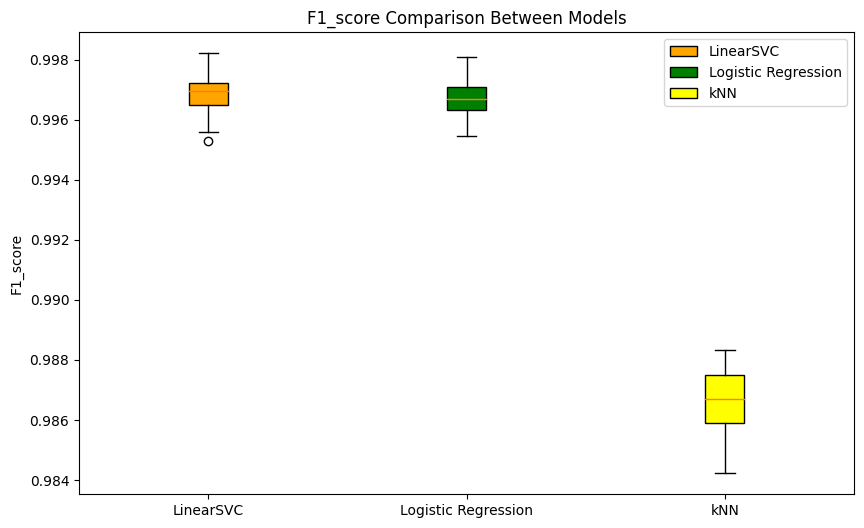

In [ ]:
LSVC_accuracy = results_df[results_df['Model'] == 'LinearSVC']['F1_score']
lr_accuracy = results_df[results_df['Model'] == 'Logistic Regression']['F1_score']
knn_accuracy = results_df[results_df['Model'] == 'kNN']['F1_score']



# The data to plot
labels = ['LinearSVC', 'Logistic Regression', "kNN"]
# Creating the boxplot
plt.figure(figsize=(10, 6))

# Plotting each dataset separately to apply different colors
box1=plt.boxplot(LSVC_accuracy, positions=[1], patch_artist=True)
box2=plt.boxplot(lr_accuracy, positions=[2], patch_artist=True)
box3=plt.boxplot(knn_accuracy, positions=[3], patch_artist=True)


box1['boxes'][0].set_facecolor('orange')
box2['boxes'][0].set_facecolor('green')
box3['boxes'][0].set_facecolor('yellow')



plt.xticks([1, 2, 3], labels)
plt.legend([box1["boxes"][0], box2["boxes"][0], box3["boxes"][0]] , labels)

plt.title('F1_score Comparison Between Models')
plt.ylabel('F1_score')
plt.savefig('model_F1_score_comparison_basic.png')
plt.show()




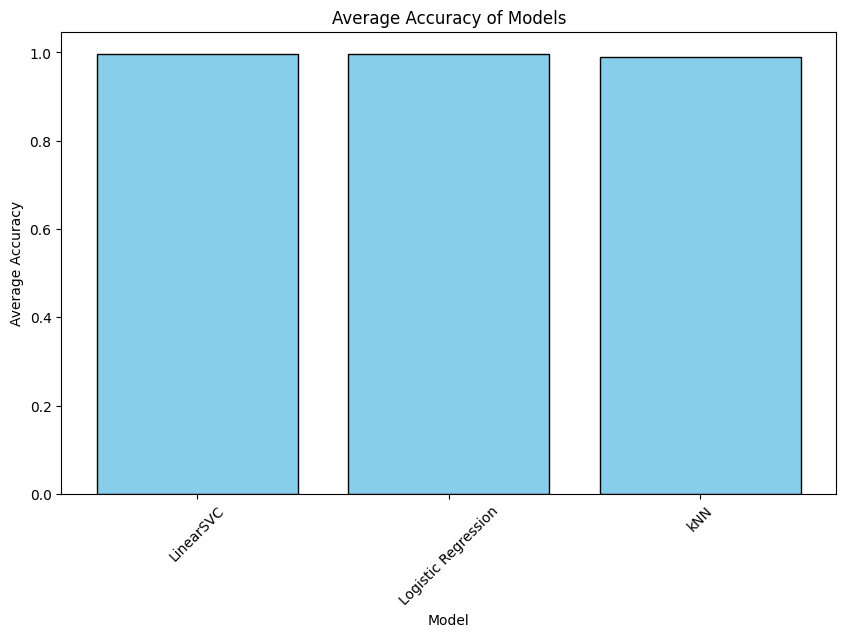

In [ ]:
# Creating a bar plot for the 'Accuracy' metric
plt.figure(figsize=(10, 6))
plt.bar(average_results['Model'], average_results['Accuracy'], color='skyblue', edgecolor='black')
plt.title('Average Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

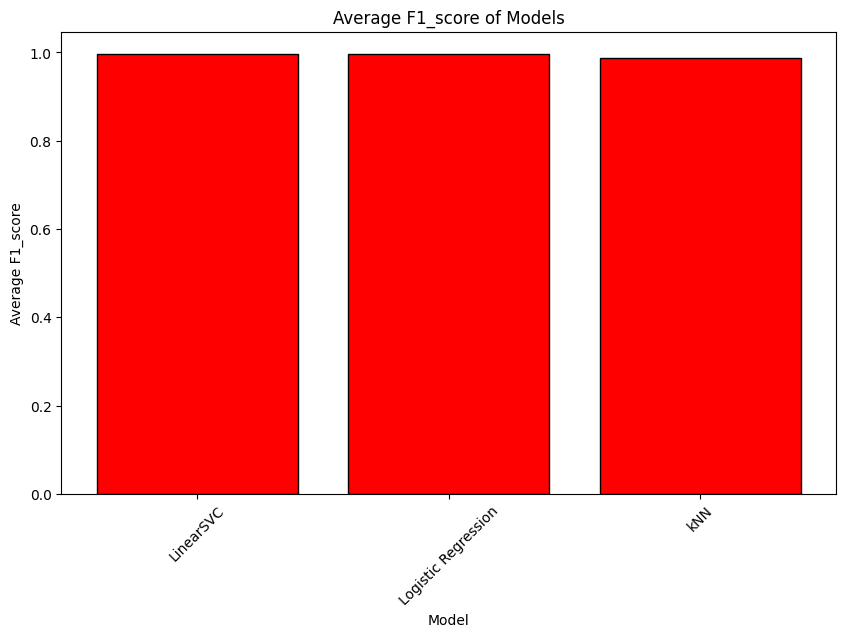

In [ ]:
# Creating a bar plot for the 'F1_score' metric
plt.figure(figsize=(10, 6))
plt.bar(average_results['Model'], average_results['F1_score'], color='red', edgecolor='black')
plt.title('Average F1_score of Models')
plt.xlabel('Model')
plt.ylabel('Average F1_score')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()